In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
#  "Mouse ID"=g989 -has two records in the database. This mouse takes two drugs at the same time.
mouse_clinical_combined_data = pd.merge(clinical_trial_data,mouse_drug_data,on = "Mouse ID")

# Display the data table for preview
pd.set_option("display.max_rows", None) 
mouse_clinical_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_Tumor_Volume_Data = mouse_clinical_combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
Mean_Tumor_Volume_Data = Mean_Tumor_Volume_Data.reset_index()

# Preview DataFrame
Mean_Tumor_Volume_Data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
StandardError_of_TumorVolumes = mouse_clinical_combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
StandardError_of_TumorVolumes = StandardError_of_TumorVolumes.reset_index()
# Preview DataFrame
StandardError_of_TumorVolumes.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
Timepoint_Drug_TumorVolume=Mean_Tumor_Volume_Data.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
Timepoint_Drug_TumorVolume.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
#transform StandardError_of_TumorVolumes DataFrame to the same format as Timepoint_Drug_TumorVolume
StandardError_of_TumorVolumes_df=StandardError_of_TumorVolumes.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


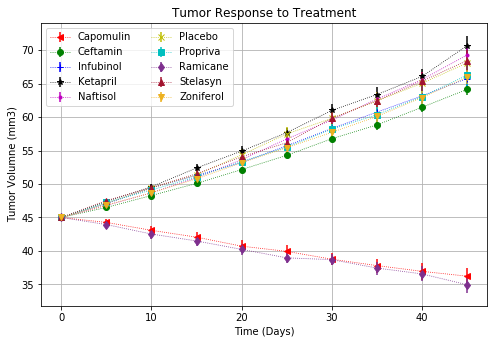

In [6]:
# Setting error bar
fig, ax = plt.subplots(figsize=(8, 5.2))

df=Timepoint_Drug_TumorVolume
err_df = StandardError_of_TumorVolumes_df

#available markers
markers = ['<','o','+','*','.','x','s','d','^','v','>','<']

#available colors
colors = ['r','g','b','k','m','y','c',[0.4940, 0.1840, 0.5560],[0.6350, 0.0780, 0.1840],[0.9290, 0.6940, 0.1250],[0.4660, 0.6740, 0.1880],[0.3010, 0.7450, 0.9330]]

#number of drugs
n = len(df.columns.tolist())

#generate a plot for each drug
for i in range(n):
    ax.errorbar(df.index.tolist(), df.iloc[:,i], err_df.iloc[:,i],color=colors[i],LineWidth=0.8,marker=markers[i],linestyle='dotted')  
        
plt.legend(loc="best",ncol=2)
plt.grid()
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volumne (mm3)")
plt.xlabel("Time (Days)")
#save to the file

plt.savefig("Timepoint_Drug_TumorVolume.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metastatic_Sites_mean = mouse_clinical_combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
Metastatic_Sites_mean = pd.DataFrame(Metastatic_Sites_mean)
# Preview DataFrame
Metastatic_Sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Metastatic_Sites_sem = mouse_clinical_combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
Metastatic_Sites_sem = pd.DataFrame(Metastatic_Sites_sem)
# Preview DataFrame
Metastatic_Sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
Metastatic_Sites_mean_table = Metastatic_Sites_mean.reset_index()
Metastatic_Sites_mean_table=Metastatic_Sites_mean_table.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
Metastatic_Sites_mean_table.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


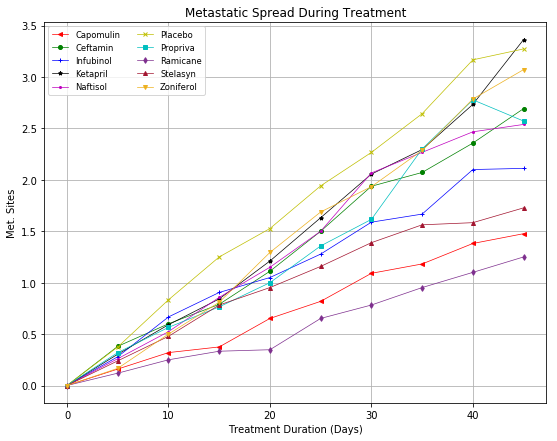

In [10]:
#Graph with error bar for all set of data looks massy. The regular line chart is created to compare all drugs.
fig, ax = plt.subplots(figsize=(9,7))

df=Metastatic_Sites_mean_table

#number of drugs
n = len(df.columns.tolist())

#Generate the Plot (with Error Bars) for each drug
for i in range(n):
    plt.plot(df.index.tolist(),df.iloc[:,i],marker=markers[i],markersize=4,linestyle='solid',color=colors[i],LineWidth=0.7)

plt.legend(loc="best",ncol=2, fontsize="small", fancybox=True)
plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
# Save the Figure
plt.savefig("Metastatic_Sites_mean.png")
# Show the Figure
plt.show()

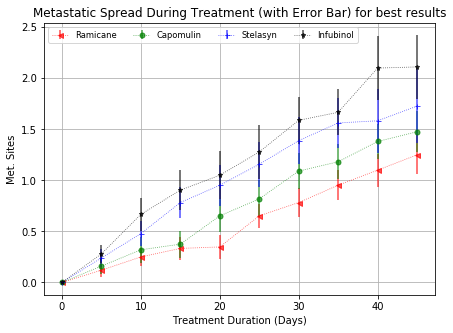

In [11]:
# Setting error bar
Metastatic_Sites_sem_table = Metastatic_Sites_sem.reset_index()
Metastatic_Sites_sem_table=Metastatic_Sites_sem_table.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

fig, ax = plt.subplots(figsize=(7, 5))
df=Metastatic_Sites_mean_table
err_df = Metastatic_Sites_sem_table

#number of drugs
l=len(Metastatic_Sites_mean_table)-1
s=Metastatic_Sites_mean_table.iloc[l,:]
s = s.sort_values(ascending=True)[0:4] 
selectedDrugs = s.keys().tolist()

n = len(selectedDrugs)
#Generate the Plot (with Error Bars) for each drug
j=0
for i in selectedDrugs:
    ax.errorbar(df.index.tolist(), df.loc[:,i], err_df.loc[:,i],alpha=0.7,color=colors[j],LineWidth=0.8,marker=markers[j],markersize=5,linestyle='dotted')  
    j += 1
    
plt.legend(loc='upper left',ncol=l,fontsize="small", fancybox=True)
plt.grid()
plt.title("Metastatic Spread During Treatment (with Error Bar) for best results")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
# Save the Figure
plt.savefig("Metastatic_Sites_mean_2.png")
# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_clinical_count = mouse_clinical_combined_data.groupby(["Drug","Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mouse_clinical_count = pd.DataFrame(mouse_clinical_count).reset_index() 
mouse_clinical_count = mouse_clinical_count.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
mouse_clinical_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mouse_clinical_count=mouse_clinical_count.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
mouse_clinical_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


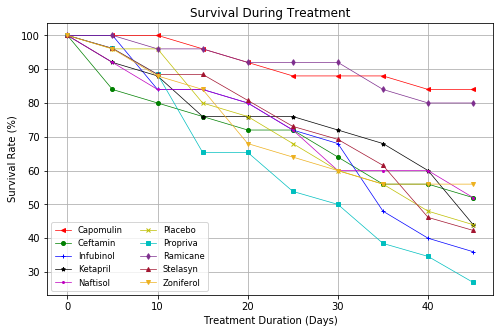

In [14]:
# Setting error bar
fig, ax = plt.subplots(figsize=(8, 5))
# Generate the Plot (Accounting for percentages)
df=mouse_clinical_count

#number of drugs
n = len(df.columns.tolist())
legends_=df.columns.tolist()

def convertValuesToPercentages(dff):
    m=dff.max()
    s=[100 * x/m for x in dff]
    return s
    
#Generate the Plot (with Error Bars) for each drug
for i in range(n):
    y_axis = convertValuesToPercentages(df.iloc[:,i])
    a = plt.plot(df.index.tolist(),y_axis,marker=markers[i],markersize=4,linestyle='solid',label=legends_[i], color=colors[i],LineWidth=0.7)
    
plt.legend(loc='best',ncol=2,fontsize="small", fancybox=True)
plt.grid()
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Treatment Duration (Days)")
# Save the Figure
plt.savefig("Survival During Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
df_Changes = Mean_Tumor_Volume_Data.copy()
df_Changes["lastTimepoint"]=df_Changes.groupby("Drug")["Timepoint"].max()[0]
df_Changes_=df_Changes.loc[df_Changes["Timepoint"]==0,["Drug","Tumor Volume (mm3)"]] 
df_Changes_lastValue=df_Changes.loc[df_Changes["Timepoint"]==df_Changes["lastTimepoint"],["Drug","Tumor Volume (mm3)"]]
df_Changes = pd.merge(df_Changes_,df_Changes_lastValue, on="Drug")
df_Changes["Percentag_changes"] = 100 *( df_Changes["Tumor Volume (mm3)_y"]-df_Changes["Tumor Volume (mm3)_x"])/df_Changes["Tumor Volume (mm3)_x"]

# Display the data to confirm
df_Changes[["Drug","Percentag_changes"]]

,Drug,Percentag_changes
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


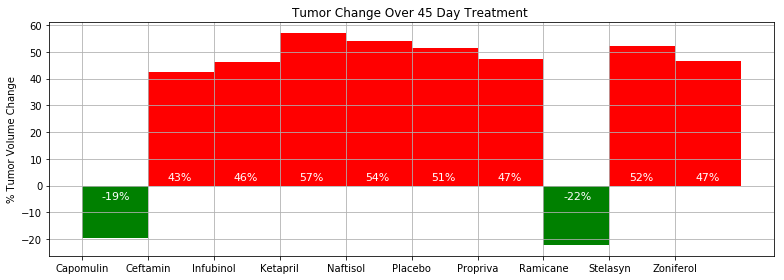

In [16]:
df_Changes = df_Changes[["Drug","Percentag_changes"]]
fig, ax = plt.subplots(1,figsize=(11, 4),sharey=True, tight_layout=True)

x_axis=[v for v in range(len(df_Changes["Drug"].tolist()))]
y_axis=df_Changes["Percentag_changes"].tolist()
for i in x_axis:
    if round(y_axis[i])<0:
        FaceColors="green"
        plt.text((2*i+1)/2-0.2,-5,"{0}%".format(round(y_axis[i])),color= "white",size=11  )
    else:
        FaceColors="red"
        plt.text((2*i+1)/2-0.2,2,"{0}%".format(round(y_axis[i])),color= "white",size=11 )
    a = plt.bar(df_Changes["Drug"][i],df_Changes["Percentag_changes"][i],1,FaceColor = FaceColors,align='edge',alpha=1  )
    a.stile='histc'
    
plt.grid(True) 
plt.title("Tumor Change Over 45 Day Treatment ")
plt.ylabel("% Tumor Volume Change")
# Save the Figure
fig.savefig("Summary Bar Graph.png")
# Show the Figure
fig.show()


Conclusion:
    1. Capomulin and Ramicate give the best results. Standard Error of Mean is relatively small for these drugs, too. 
    2. Based on this data, Ketaprin, Naftisol, and Stelasyn give worse results than Placebo. These drugs do more harm than good.